In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
import time

In [3]:
#Install driver
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Get LATEST driver version for 90.0.4430
Trying to download new driver from https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_mac64.zip
Driver has been saved in cache [/Users/anders/.wdm/drivers/chromedriver/mac64/90.0.4430.24]


In [4]:
url = 'https://www.google.com/search?q=xrp+ripple&hl=en&tbm=nws&sxsrf=ALeKk03XKciuIU-UEXSB96wOOlnTghp8nA:1621204645492&source=lnt&tbs=qdr:m&sa=X&ved=0ahUKEwirq4L4oc_wAhVOop4KHYDKCeMQpwUIKg&biw=1309&bih=632&dpr=2.2'
driver.get(url)

In [5]:
from datetime import date, timedelta
news_title = []
news_abstract = []
news_date = []
while True:
    for element in driver.find_elements_by_css_selector('div.JheGif.nDgy9d'):
        news_title.append(element.text)
    for element in driver.find_elements_by_css_selector('div.Y3v8qd'):
        news_abstract.append(element.text)
    for element in driver.find_elements_by_css_selector('span.WG9SHc'):
        if element.text.split()[-2] == 'hours' or element.text.split()[-2] == 'hour':
            news_date.append(date.today().strftime('%m-%d-%Y'))
        elif element.text.split()[-2] == 'weeks' or element.text.split()[-2] == 'week':
            week = int(element.text.split()[0])
            date = date.today() - timedelta(weeks=week)
            news_date.append(date.strftime('%m-%d-%Y'))
        elif element.text.split()[-2] == 'months' or element.text.split()[-2] == 'month':
            month = int(element.text.split()[0])
            date = date.today() - timedelta(days=month*30)
            news_date.append(date.strftime('%m-%d-%Y'))
        elif element.text.split()[-2] == 'days' or element.text.split()[-2] == 'day':
            day = int(element.text.split()[0])
            date = date.today() - timedelta(days=day)
            news_date.append(date.strftime('%m-%d-%Y'))
    try:
        driver.find_element_by_css_selector('a#pnnext').click()
        time.sleep(1)
    except NoSuchElementException:
        break

In [6]:
news_data = {'Date': news_date, 'Headline': news_title, 'Description': news_abstract}
xrpNews = pd.DataFrame(news_data)
xrpNews.head(10)

,Date,Headline,Description
0,05-24-2021,XRP Price Forecast: Ripple significantly under...,XRP price trades below longstanding trend line...
1,05-24-2021,SEC v. Ripple heats up with battle over legal ...,"Other U.S. financial watchdogs, such as the CF..."
2,05-24-2021,Why is Ripple $XRP so cheap compared to other ...,Ripple is a blockchain payment protocol used b...
3,05-24-2021,"Ripple Is Not behind Bitcoin Energy Usage FUD,...",Ripple CEO Brad Garlinghouse recently responde...
4,05-24-2021,Ripple Price Analysis: XRP Sees 8% Daily Bounc...,Ripple Price Analysis: XRP Sees 8% Daily Bounc...
5,05-18-2021,We Need A Ripple Test To Stop The SEC’s Overre...,"The total market cap of all cryptocurrencies, ..."
6,05-24-2021,XRP Price Prediction: Ripple rebound may be sh...,XRP price was able to rebound after a steep co...
7,05-21-2021,Ripple (XRP) News for Friday: 5 Top Headlines ...,Ripple (CCC:XRP-USD) news continues to be a ho...
8,05-21-2021,"Ethereum, Ripple'x XRP, Dogecoin slump along w...","Ethereum, Ripple'x XRP, Dogecoin slump along w..."
9,05-23-2021,XRP Price Prediction: Ripple targets $0.65 as ...,XRP price drops like a stone as sell-off engul...


In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
headlineScores = xrpNews['Headline'].apply(vader.polarity_scores).tolist()
headlineData = pd.DataFrame(headlineScores)

descrpScores = xrpNews['Description'].apply(vader.polarity_scores).tolist()
descrpData = pd.DataFrame(descrpScores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anders/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
headlineData.head(10)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.215,0.661,0.124,-0.2732
2,0.000,1.000,0.000,0.0000
3,0.341,0.659,0.000,-0.5643
4,0.000,1.000,0.000,0.0000
5,0.180,0.820,0.000,-0.2960
6,0.000,1.000,0.000,0.0000
7,0.000,0.847,0.153,0.2023
8,0.000,1.000,0.000,0.0000
9,0.000,1.000,0.000,0.0000


In [9]:
descrpData.head(10)

,neg,neu,pos,compound
0,0.077,0.923,0.000,-0.2732
1,0.000,0.836,0.164,0.6249
2,0.000,0.902,0.098,0.3612
3,0.095,0.905,0.000,-0.3182
4,0.000,0.832,0.168,0.6652
5,0.000,0.848,0.152,0.6124
6,0.117,0.883,0.000,-0.5106
7,0.000,0.922,0.078,0.2960
8,0.000,1.000,0.000,0.0000
9,0.000,0.822,0.178,0.6369


In [10]:
xrpNews['Headline Polarity'] = headlineData['compound']
xrpNews['Description Polarity'] = descrpData['compound']
xrpNews['Total Polarity'] = xrpNews[['Headline Polarity', 'Description Polarity']].sum(axis=1)

In [11]:
def sentimentResult(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
xrpNews['Sentiment'] = xrpNews['Total Polarity'].apply(sentimentResult)

xrpNews

,Date,Headline,Description,Headline Polarity,Description Polarity,Total Polarity,Sentiment
0,05-24-2021,XRP Price Forecast: Ripple significantly under...,XRP price trades below longstanding trend line...,0.0000,-0.2732,-0.2732,Negative
1,05-24-2021,SEC v. Ripple heats up with battle over legal ...,"Other U.S. financial watchdogs, such as the CF...",-0.2732,0.6249,0.3517,Positive
2,05-24-2021,Why is Ripple $XRP so cheap compared to other ...,Ripple is a blockchain payment protocol used b...,0.0000,0.3612,0.3612,Positive
3,05-24-2021,"Ripple Is Not behind Bitcoin Energy Usage FUD,...",Ripple CEO Brad Garlinghouse recently responde...,-0.5643,-0.3182,-0.8825,Negative
4,05-24-2021,Ripple Price Analysis: XRP Sees 8% Daily Bounc...,Ripple Price Analysis: XRP Sees 8% Daily Bounc...,0.0000,0.6652,0.6652,Positive
...,...,...,...,...,...,...,...
185,05-10-2021,Ripple's XRP Sales Grew 97 Percent in,"It attributes the increase to ""deeper engageme...",0.0000,0.6486,0.6486,Positive
186,05-03-2021,"Another XRP tech update: Why Ripple CTO, XRPL ...","Another XRP tech update: Why Ripple CTO, XRPL ...",-0.2960,-0.2960,-0.5920,Negative
187,05-17-2021,This Bitcoin bull on XRP supporters: They just...,"Was it the XRP supporters, the whales, public ...",0.6369,0.4404,1.0773,Positive
188,04-24-2021,Jed McCaleb Shifts 202 Million XRP Over Past 1...,"""Tacostand"" was set up in 2013 when McCaleb le...",0.0000,0.0000,0.0000,Neutral


In [20]:
xrpSentiment = xrpNews.groupby('Sentiment').size().reset_index(name='Counts')
xrpSentiment

,Sentiment,Counts
0,Negative,46
1,Neutral,49
2,Positive,95


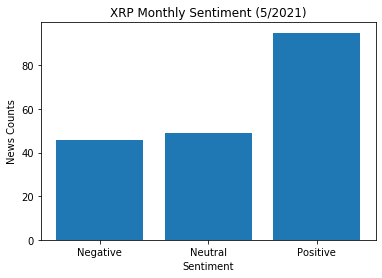

In [32]:
from datetime import datetime
plt.bar(xrpSentiment['Sentiment'], xrpSentiment['Counts'])
plt.title('XRP Monthly Sentiment (%s/%s)' % (datetime.today().month, datetime.today().year))
plt.xlabel('Sentiment')
plt.ylabel('News Counts')
plt.show()